# Análisis del rendimiento de los estudiantes

Establecemos las siguientes preguntas a resolver 
1. ¿Qué variables son determinantes o tienen un alto impacto en las calificaciones?
2. ¿El consumo de alcohol por parte de los estudiantes afecta en la relación con su familia?
3. La dirección del hogar del estudiante (rural o urbana) ¿afecta en el rendimiento de los estudiantes? (actividades extracurriculares, tiempo libre, etc.)


## Conjunto de datos

Primero importaremos las librerías a utilizar así como nuestro conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
data = pd.read_csv("student_data.csv")

Información sobre el conjunto de datos:

1. `school` - Escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
2. `sex` - Sexo del estudiante (binario: 'F' - mujer o 'M' - hombre)
3. `age` - Edad del estudiante (numérica: de 15 a 22)
4. `address` - Tipo de dirección del hogar del estudiante (binario: 'U' - urbano o 'R' - rural)
5. `famsize` - Tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)
6. `Pstatus` - Estado de convivencia de los padres (binario: 'T' - vivir juntos o 'A' - aparte)
7. `Medu` - Educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria, 4 - educación superior)
8. `Fedu` - Educación del padre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2º - 5º a 9º grado, 3º - educación secundaria, 4º - educación superior)
9. `Mjob`- Trabajo de la madre (nominal: 'maestro', 'salud' relacionado, 'servicios' civiles (por ejemplo, administrativo o policial), 'at_home' u 'otro')
10. `Fjob` - Trabajo del padre (nominal: 'maestro', 'salud' relacionado, 'servicios' civiles (por ejemplo, administrativo o policial), 'at_home' u 'otro')
11. `reason` - Razón para elegir esta escuela (nominal: cerca de 'casa', 'reputación' de la escuela, preferencia de 'curso' u 'otro')
12. `guardian` - Tutor del estudiante (nominal: 'madre', 'padre' u 'otro')
13. `traveltime` - Tiempo de viaje de casa a la escuela (numérico: 1 - < 15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
14. `studytime` - Tiempo de estudio semanal (numérico: 1 - < 2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
15. `failures` - Número de fracasos de clases anteriores (numérico: n si 1< = n < 3, de lo contrario 4)
16. `schoolsup` - Apoyo educativo adicional (binario: sí o no)
17. `famsup` - Apoyo educativo familiar (binario: sí o no)
18. `paid` - Clases extra pagadas dentro de la asignatura del curso (Matemáticas o Portugués) (binario: sí o no)
19. `activities` - Actividades extracurriculares (binario: sí o no)
20. `nursery` - Asistió a la guardería (binario: sí o no)
21. `higher` - Quiere tomar educación superior (binario: sí o no)
22. `internet` - Acceso a Internet en casa (binario: sí o no)
23. `romantic` - Con una relación romántica (binario: sí o no)
24. `famrel` - Calidad de las relaciones familiares (numérica: de 1 - muy malo a 5 - excelente)
25. `freetime` - Tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
26. `goout` (numérico: de 1 - muy bajo a 5 - muy alto)
27. `Dalc` - Consumo de alcohol en la jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)
28. `Walc` - Consumo de alcohol de fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
29. `health` - Estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
30. `absences` - Número de ausencias escolares (numérico: de 0 a 93)

Los siguientes grados están relacionados con la asignatura del curso, Matemáticas o Portugués:
31. `G1` - Nota del Primer periodo(numérico: de 0 a 20)
31. `G2` - Nota del Segundo periodo (numérico: de 0 a 20)
32. `G3` - Nota final (numérica: de 0 a 20, objetivo de salida)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Procesamiento y limpieza de datos

Ahora revisamos nuestro conjunto de datos para limpiarlos en caso de ser necesario

In [4]:
#Revisamos los valores únicos para cada variable
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [5]:
#Revisamos la cantidad de datos para cada columna así como la cantidad de celdas nulas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
#Revisamos diversos datos para cada columna, como el rango de valores, la cantidad de filas, etc
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Podemos corroborar que no hay necesidad de limpiar nuestro conjunto, pues los valores máximos, mínimo, únicos, etc. concuerdan con el rango de valores establecidos al principio para cada variable, así como que no existen valores nulos en nuestro conjunto.



---



## Análisis

### **Pregunta 1**
¿Qué variables son determinantes o tienen un alto impacto en las calificaciones?


Para agilizar el proceso de análisis, obtendremos el promedio de las calificaciones, es decir el promedio de `G1`, `G2` y `G3`

In [7]:
data["MeanG"] = round((data["G1"] + data["G2"] + data["G3"])/3,2)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,MeanG
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.67


Una vez hecho esto, procedemos a realizar un mapa de calor con el fin de encontrar el coeficiente de correlación que tienen entre si las variables con nuestra variable de interés que es `MeanG`

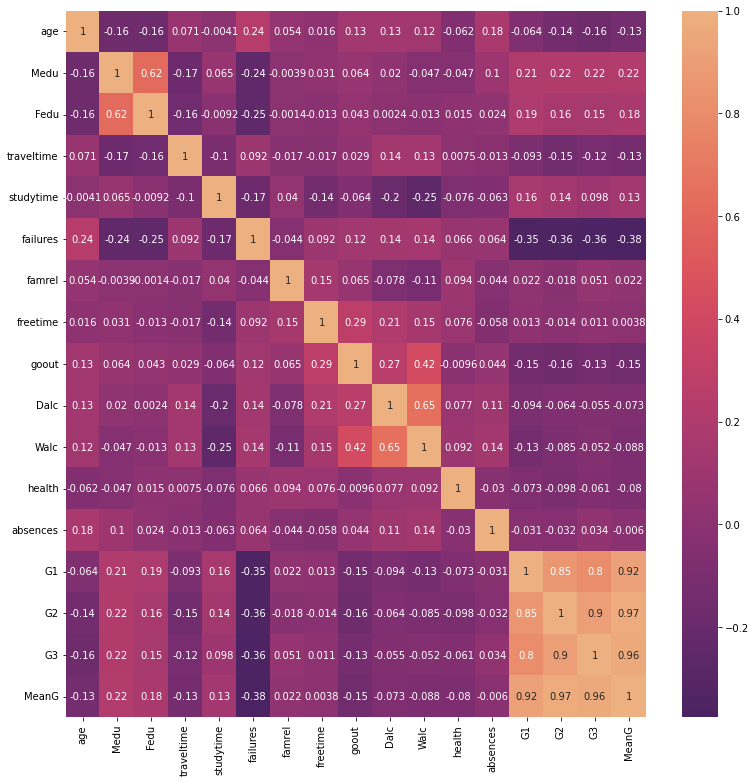

In [8]:
plt.figure(figsize = (13,13))
sns.heatmap(data.corr(), annot = True, cmap = "flare_r")
plt.show()

De este mapa de calor encontramos que existe una considerable correlación positiva respecto de las demás con: 
+ `Medu`
+ `Fedu`
+ `studytime`

y una considerable correlación negativa con:
+ `failures`
+ `goout`

Por lo que analizaremos más a profundidad dichas variables


---




**Medu** y **Fedu**

Para el caso de la educación de la madre y el padre, `Medu` y `Fedu`, respectivamente, tenemos lo siguiente

In [9]:
#Creación de tabla
data_MFedu = data[["Medu","Fedu", "MeanG"]]
data_MFedu.head()

,Medu,Fedu,MeanG
0,4,4,5.67
1,1,1,5.33
2,1,1,8.33
3,4,2,14.67
4,3,3,8.67


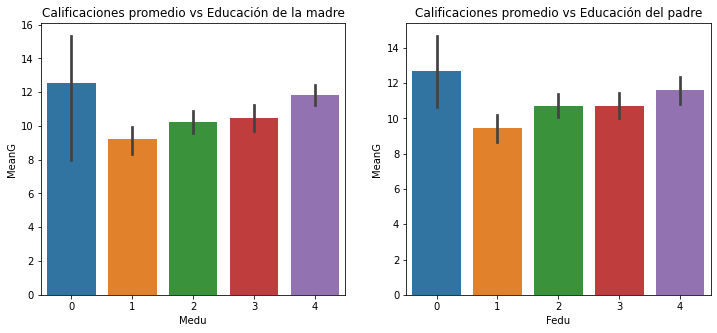

In [10]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

ax1 = sns.barplot(data = data_MFedu, x = "Medu", y = "MeanG", ax = ax[0])
ax1.set(title = "Calificaciones promedio vs Educación de la madre")

ax2 = sns.barplot(data = data_MFedu, x = "Fedu", y = "MeanG", ax = ax[1])
ax2.set(title = "Calificaciones promedio vs Educación del padre")

plt.show()

En las gráficas anteriores podemos notar que, para aquellos padres en los que la educación es ninguna (0) y superior (4), la calificación media es mayor con respecto de las demás observaciones (1, 2, 3), sin embargo, para el caso de `Fedu` = 0 solamente hay 2 ocurrencias mientras que para `Medu` = 0 hay 3, por lo que si las ignoramos 

In [11]:
#Aplicando filtro para eliminar Fedu = 0 y Medu = 0
data_MFeduF = data_MFedu.query("Fedu > 0")
data_MFeduF = data_MFeduF.query("Medu > 0")

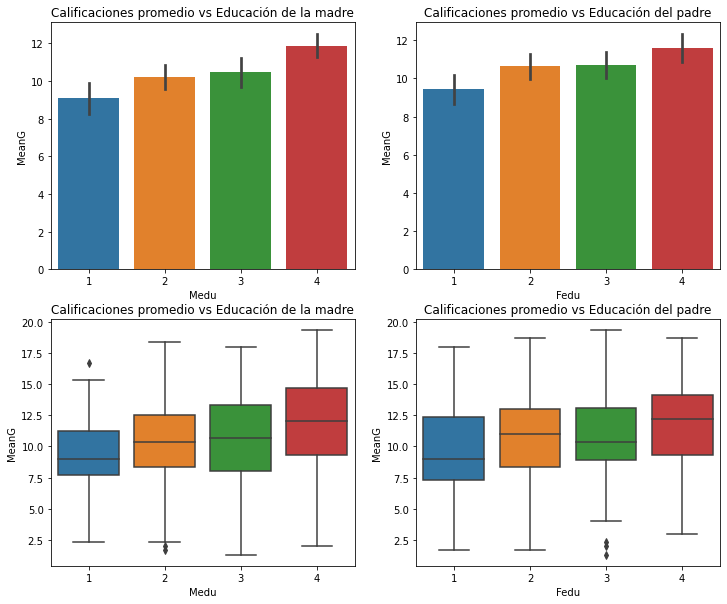

In [179]:
fig, ax = plt.subplots(2,2, figsize = (12,10))

ax1 = sns.barplot(data = data_MFeduF, x = "Medu", y = "MeanG", ax = ax[0,0])
ax1.set(title = "Calificaciones promedio vs Educación de la madre")

ax2 = sns.barplot(data = data_MFeduF, x = "Fedu", y = "MeanG", ax = ax[0,1])
ax2.set(title = "Calificaciones promedio vs Educación del padre")

ax3 = sns.boxplot(data = data_MFeduF, x = "Medu", y = "MeanG", ax = ax[1,0])
ax3.set(title = "Calificaciones promedio vs Educación de la madre")

ax4 = sns.boxplot(data = data_MFeduF, x = "Fedu", y = "MeanG", ax = ax[1,1])
ax4.set(title = "Calificaciones promedio vs Educación del padre")

plt.show()

Obtenemos para ambos casos que la calificación media es mayor para aquellos estudiantes en los que la educación de sus padres es superior (4).


---



**studytime**

Para el caso del tiempo de estudio, `studytime`, tenemos lo siguiente

In [13]:
#Creación de tabla
data_studytime = data[["studytime", "MeanG"]]
data_studytime.head()

,studytime,MeanG
0,2,5.67
1,2,5.33
2,2,8.33
3,3,14.67
4,2,8.67


In [14]:
#Contando el número de ocurrencias para cada valor en studytime
data_studytime.groupby(by = "studytime").count()

,MeanG
studytime,
1,105
2,198
3,65
4,27


De la siguiente gráfica podemos observar lo siguiente:

* Para `studytime = 3`, que cuenta con 105 ocurrencias, la mayoría de los estudiantes consiguen calificaciones entre 9.3 y 14.33, con un mínimo de 2.3 y un máximo de 18.7

* Para `studytime = 4`, que cuenta con 198 ocurrencias, la mayoría de los estudiantes consiguen calificaciones entre 8.48 y 14.33,menor que en el punto anterior pero con un mínimo de 5.33 y un máximo de 19.33

* A medida en que las horas de estudio incrementen, las calificaciones obtenidas también serán mayores.


In [15]:
px.box(data_studytime, x = "studytime", y = "MeanG", notched = True, height=400, width=700, color = "studytime")



---



**Failures**

Ahora, para las correlaciones negativas, empezamos estudiando a la variable `failures`

In [16]:
#Creación de tabla
data_fail = data[["failures", "MeanG"]]
data_fail.head()

,failures,MeanG
0,0,5.67
1,0,5.33
2,3,8.33
3,0,14.67
4,0,8.67


In [17]:
#Contando el número de valores para cada valor en failures
data_fail.groupby(by = "failures").count()

,MeanG
failures,
0,312
1,50
2,17
3,16


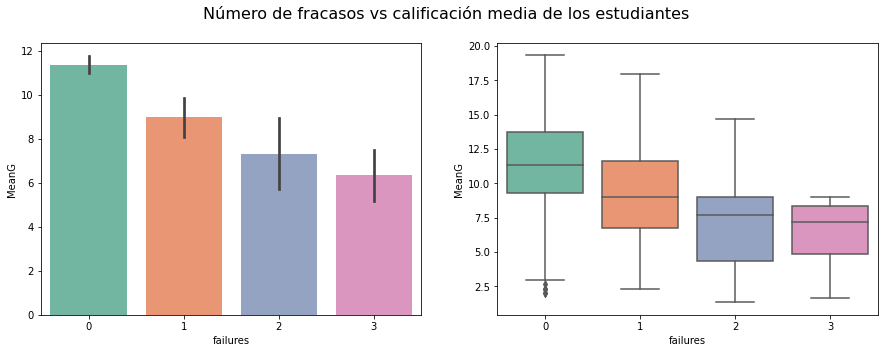

In [18]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
plt.suptitle("Número de fracasos vs calificación media de los estudiantes", fontsize = 16)

sns.barplot(data = data_fail, x = "failures", y = "MeanG", ax = ax[0], palette = "Set2")

sns.boxplot(data = data_fail, x = "failures", y = "MeanG", ax = ax[1], palette = "Set2")
plt.show()

De las gráficas anterior encontramos que:
* El número máximo de fracasos es de 3, no hay estudiante que haya fracasado 4 veces en clases anteriores
* Entre menor sea el número de fracasos, mayor será la calificación media que estos obtengan y viceversa.
---



**goout**

Para el caso de `goout`, es decir, las salidas con amigos, tenemos lo siguiente

In [19]:
#Creación de tabla
data_goout = data[["goout", "MeanG"]]
data_goout.head()

,goout,MeanG
0,4,5.67
1,3,5.33
2,2,8.33
3,2,14.67
4,2,8.67


In [20]:
#Contando el número de valores para cada valor en goout
data_goout.groupby(by = "goout").count()

,MeanG
goout,
1,23
2,103
3,130
4,86
5,53


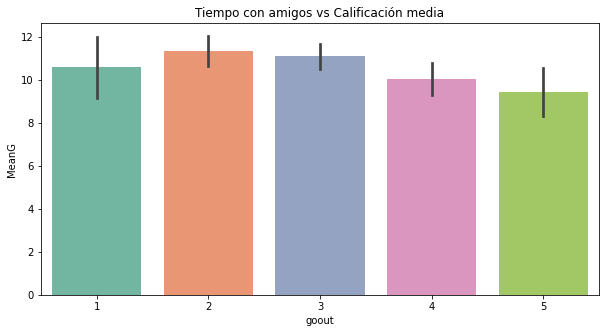

In [180]:
plt.figure(figsize = (10,5))
sns.barplot(data = data_goout, x = "goout", y = "MeanG", palette = "Set2")
plt.title("Tiempo con amigos vs Calificación media")
plt.show()

In [184]:
plt.figure(figsize = (10,5))
px.box(data_goout, x = "goout", y = "MeanG", notched = True,  height=400, width=700, color = "goout")

<Figure size 720x360 with 0 Axes>

De los gráficos anteriores notamos lo siguiente:

* Aquellos estudiantes que salen con amigos de forma poco frecuente (2), tienden a tener mejores calificaciones.
* La diferencia con respecto de `goout = 3` y `goout = 4` no es demasiado grande, por lo que salir con amigos con frecuencia moderada puede aumentar las calificaciones de los estudiantes.



---



Adicional a esto, revisaremos la relación entre las variables categóricas `Mjob`, `Fjob`, `higher` con `MeanG`

In [23]:
#Contamos el número de ocurrencias para cada valor
data.value_counts(data["Mjob"])

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
dtype: int64

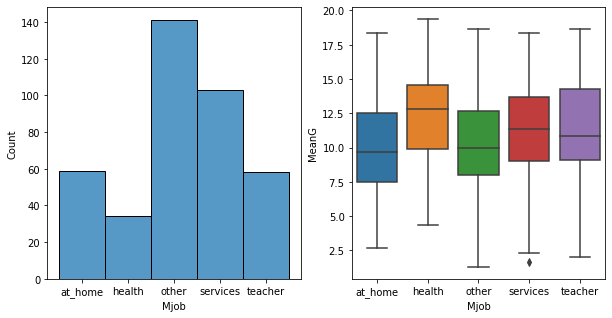

In [24]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = "Mjob", ax = ax[0])
sns.boxplot(data = data, x = "Mjob", y = "MeanG", ax = ax[1])

Podemos notar que, cuando `Mjob = health`, la calificación media es mayor con respecto de los demás, mientras que para `Mjob = other`, las calificaciones medias obtenidas por los estudiantes es menor

In [185]:
#Contamos el número de ocurrencias para cada valor
data.value_counts(data["Fjob"])

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
dtype: int64

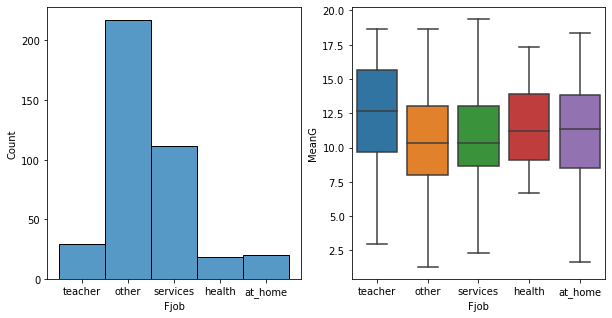

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = "Fjob", ax = ax[0])
sns.boxplot(data = data, x = "Fjob", y = "MeanG", ax = ax[1])

En cuanto al trabajo del papá, tenemos que cuando el trabajo de este es ser maestro `teacher`, se obtienen mejores calificaciones, mientras que para `Fjob = other`. son mucho menores.



---



**higher**

Para aquellos estudiantes que quieren cursar la educación superior,  `higher`, tenemos

In [27]:
#Contamos el número de ocurrencias para cada valor
data.value_counts(data["higher"])

higher
yes    375
no      20
dtype: int64

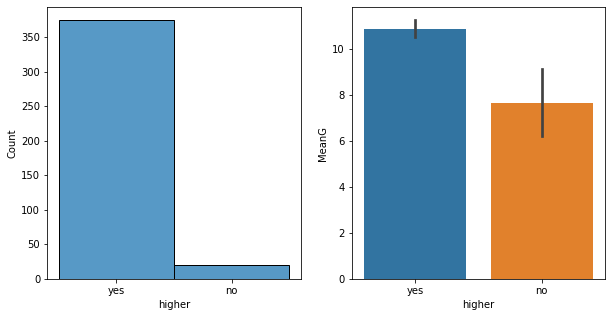

In [28]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(data = data, x = "higher", ax = ax[0])
sns.barplot(data = data, x = "higher", y = "MeanG", ax = ax[1])

Podemos observar que la cantidad de alumnos que desean cursar la educación superior es mucho mayor que aquellos que no, lo cual se ve reflejado en `MeanG`, pues aquellos que respondieron `yes`, tienen una media de calificaciones mayor que aquellos que no.



---



### **Pregunta 2**
¿El consumo de alcohol por parte de los estudiantes afecta en la relación con su familia?

In [29]:
#Creamos nuestra tabla 
data_alc = data[["Dalc", "Walc", "famrel", "sex"]]
data_alc.head()

,Dalc,Walc,famrel,sex
0,1,1,4,F
1,1,1,5,F
2,2,3,4,F
3,1,1,3,F
4,1,2,4,F


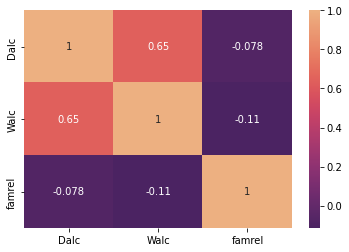

In [30]:
#Realizamos un mapa de calor para encontrar los coeficientes de correlación
sns.heatmap(data_alc.corr(), annot = True, cmap = "flare_r")
plt.show()

De este mapa de calor podemos observar lo siguiente:

* `Dalc vs Walc`: Dichas variables poseen un coeficiente de correlación positivo de 0.65, es decir, a medida que aumenta el consumo diario de alcohol, también lo hará el consumo semanal del mismo y viceversa

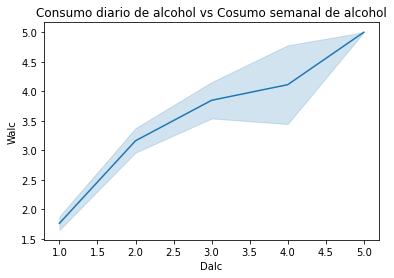

In [189]:
sns.lineplot(data = data_alc, x = "Dalc", y = "Walc")
plt.title("Consumo diario de alcohol vs Cosumo semanal de alcohol")
plt.show()

+ `famrel`: Existe un coeficiente de correlación negativo tanto con `Dalc` y `Walc`, pero es en el caso de este último que dicha relación es más notable, por lo que la relación familiar disminuye a medida que el consumo semanal de alcohol aumenta.

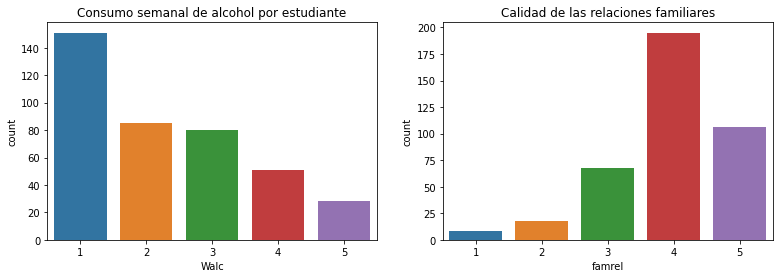

In [32]:
fig, ax = plt.subplots(1,2, figsize = (13,4))

ax2 = sns.countplot(x = data_alc["Walc"], ax= ax[0])
ax2.set(title = "Consumo semanal de alcohol por estudiante")

ax3 = sns.countplot(x = data_alc["famrel"], ax = ax[1])
ax3.set(title = "Calidad de las relaciones familiares")

plt.show()

In [190]:
#Revisamos el diagrama de caja para el consumo semanal de alcohol vs la relación familiar
px.box(data_alc, x = data_alc["Walc"], y = "famrel", width = 700, height = 400, notched = True, color = "Walc")

Podemos notar lo siguiente:

* Para el caso de que el consumo de alcohol sea moderado, `Walc = 3`, casi todos los estudiante poseen una buena relación familiar `famrel = 4`, puesto que el resto de valores (1, 2, 3, 5) son valores atípicos

* En general, podemos observar que, si bien no es muy significativo, se puede apreciar que a medida que el consumo de alcohol semanal aumenta, la calidad de la relación familiar disminuye.

* El consumo de alcohol por parte de los estudiantes afecta a la relación que tiene con su familia.




---



### **Pregunta 3**
La dirección del hogar del estudiante (rural o urbana) ¿afecta en el rendimiento de los estudiantes? (actividades extracurriculares, tiempo libre, etc.)

Primero, si revisamos la cantidad de estudiantes por zona de vivienda (R ó U), notamos que hay una gran diferencia, pues la cantidad de estudiantes provenientes de zona urbana es mayor que aquellos de la zona rural

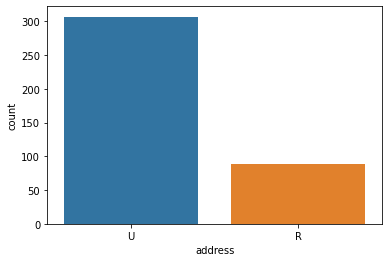

In [191]:
#Contamos el número de estudiantes para cada dirección
sns.countplot(x = data["address"])

Ahora, revisemos la cantidad de estudiantes de cada zona por escuela

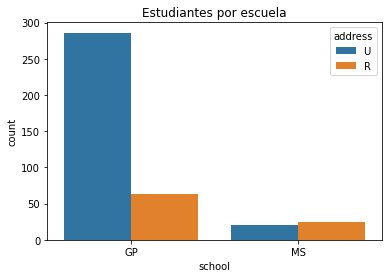

In [115]:
sns.countplot(x = data["school"], hue = data["address"])
plt.title("Estudiantes por escuela")
plt.show()

Observamos que:
* La escuela Gabriel Pereira GP tiene más estudiantes que la Mousinho da Silveira MS
* Para la escuela GP, la cantidad de estudiantes provenientes de una zona urbana es mucho mayor que aquellos de una zona rural
* Para la escuela MS, la diferencia no es mucha pero `address = R` es ligeramente mayor


---



Reivsamos ahora si la dirección afecta en las actividades curriculares de los estudiantes

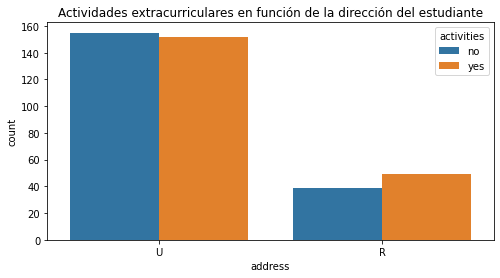

In [193]:
plt.figure(figsize = (8,4))
sns.countplot(x = data["address"], hue = data["activities"])
plt.title("Actividades extracurriculares en función de la dirección del estudiante")
plt.show()

Notamos lo siguiente: 
* Para los estudiantes que `address = U`, la diferencia entre si hacen o no alguna actividad extracurricular es muy poca
* Para los estudiantes que `address = R`, la diferencia es ligeramente más notable al realizar actividades extracurriculares, considerando la cantidad de estudiantes provenientes de zonas rurales


---



Revisamos ahora la razón por la que los estudiantes escogieron cada escuela

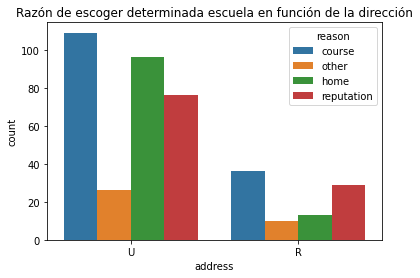

In [195]:
sns.countplot(x = data["address"], hue = data["reason"])
plt.title("Razón de escoger determinada escuela en función de la dirección")
plt.show()

Podemos observar 
* Existen algunas similutes, pues para ambas zonas (Rural y Urbana), las razones principales por las que escogieron dicha escuela es por poseer algún curso de su preferencia y por la reputación de la institución.

* Algo que se veía venir es que difieren en cuanto a su elección debido a la cercanía a con su casa, pues para los estudiantes de zona rural dicha opción no es de la más populares, caso contrario para la zona urbana


---



Fuente: https://www.kaggle.com/code/aldogaln/an-lisis-del-rendimiento-de-los-estudiantes/data?scriptVersionId=106236957)